# Final Assignment: Datacademy - Auction data
You will be working with a real-world data set, that is collected by a `digital auction house`. <br>
As a data professional, your task is to use this data to improve the process of the auction house. <br>
The data consist of three related tables: `auctions`, `lots` and `bids`. <br>
Auctions concern the actual events at which lots (items) are auctioned, after which the bids table contains all bids placed. <br>
A more detailed overview of what these tables are comprised of is given below:

1. Table `auctions` with columns:
   * `id`: the auction id, uniquely identifying an auction (`int`).
   * `relatedCompany`: the concerning company for which the items will be auctioned (`str`).
   * `auctionStart`: the date and time at which the auction started (`datetime.date`).
   * `auctionEnd`: the date and time at which the auction ended (`datetime.date`).
   * `branchCategory`: the branch to which the product to be auctioned are categorized (`str`).
2. Table `lots` with columns:
   * `countryCode`: description of the country the lot is auctioned in (`str`).
   * `saleDate`: the date and time at which the lot is sold (`datetime.date`).
   * `auctionID`: the id reference of the auction at which the lot is offered (`int`).
   * `lotNr`: the numeric indicator of the lot within its auction (`int`). 
   * `suffix`: additional information to the lot number (`str`).
   * `numberOfItems`: the number of items offered within the lot (`float`).
   * `buyerAccountID`: the id of the bidder who won the auction and bought the lot (`float`).
   * `estimatedValue`: the estimated value of the items comprising the lot (`float`).
   * `StartingBid`: the initial price for which the lot is offered (`float`).
   * `reserveBid`: the minimum amount that the seller will accept as the winning bid (`int`).
   * `currentBid`: the actual bid offered for the auctioned lot (`float`).
   * `vat`: the percentage tax payed for the auctioned lot (`int`).
   * `category`: the category of products to which this lot is assigned (`str`).
   * `sold`: indicator whether the lot is sold or is left unsold (`int`).
3. Table `bids` with columns:
   * `auctionID`: the id reference of the auction at which the lot is offered (`int`).
   * `lotNr`: the numeric indicator of the lot in which the bid is made (`int`).
   * `lotID`: reference ID describing the lot in which the bid is made (`int`).
   * `isCombination`: indicator if the bid is considered within a combination of bids (`int`).
   * `accountID`: the id of the bidder who placed the bid (`int`).
   * `isCompany`: indicator whether the bidder concerns a company (`int`).
   * `bidPrice`: the price the bidder offered (`int`).
   * `biddingDateTime`: the time the bid was placed by the bidder (`datetime.date`).
   * `closingDateTime`: the time the lot is planned to close(`datetime.date`).

Good luck!

<hr>

## A. Import libraries

Installation of all Python libraries is done using `poetry`, when we created the `environment` in the setup. <br>
Below all libraries are imported and are given the correct `aliasses`, which are often used in practice. <br>
You simply have the run the code cell and you can start creating! 

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import sqlite3
import joblib

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

modulePath = "/Modules/M10_FINAL/src"
dataPath = "data"

In [4]:
from datacademy.modules import Module10

#module = Module10(server_address='https://devdatacademyapi.azurewebsites.net')
module = Module10(server_address='localhost')

<hr>

## B. Descriptive Analytics
All Data Science projects start by getting a clear understanding of the data. <br>
This section will guide you through the steps to execute descriptive analytics and familiarize yourself with the available data. <br>
We set out some logical steps that would normally be included in such an initial data review. <br>
These steps utilize basic Python (/Pandas) functions, used to do the follow:

* `Read the data` - Read the data from the given data source.
* `Quick view` - Look at the first x rows of the data set.
* `Missing values` - Investigate the amount of missing values.
* `Outliers` - Review the numerical ranges in the data set.
* `Analyze categories` - Investigate the distribution over the available categories.

Execution of these steps will give you a basic understanding of your data. <br>
Basic understanding is sufficient for now, the rest will come when you start building and training your models.

### B1. Read the data
As you will be working with larger data sets, we share them in a more suitable way. <br>
`Parquet` is a data format designed to handle large amounts of data. <br>
Reading them can be done in a similar way as we did with `CSV` files in the past. <br>
However, now we use the command <code>pd.read_parquet()</code> and the file extension <code>.parquet</code>.

In [5]:
#TODO: Read the auctions, lots and bids using the dataPath
auctions = pd.read_parquet(dataPath+"/auctions.parquet")
lots = pd.read_parquet(dataPath+"/lots.parquet")
bids = pd.read_parquet(dataPath+"/bids.parquet")

### B2. Quick view
To start we quickly review the first rows of the different data frames. <br>
In doing so, we get a feeling for the structure of the data frame and the actual content that is in there. <br>
The `.head()` function returns by default the first 5 rows. <br>
If, for example, you want to retrieve the first 10 rows, you can use it as follows `.head(n=10)`.

In [6]:
#TODO: Print and investigate the first 10 rows of the auctions dataframe.
auctions.head(n=10)

,id,relatedCompany,auctionStart,auctionEnd,branchCategory
0,200001,Solutions Electronic Advanced,2017-12-22 16:32:01,2018-01-10 15:02:01,transport
1,200002,Design Systems Source,2017-09-20 13:50:04,2018-01-10 13:10:04,metal
2,200003,Electronic Design Internet,2018-02-01 14:09:22,2018-01-10 13:09:22,woodworking
3,200136,Contract Graphics Adventure,2018-05-23 16:11:20,2018-06-01 10:11:20,construction
4,200139,Alpha Virtual,2018-02-05 12:50:01,2018-02-09 12:30:01,construction
5,200006,Design Vision Inc,2018-01-08 08:26:09,2018-01-16 14:56:09,other
6,200007,Hardware West Organization,2017-11-23 09:27:00,2018-01-30 13:27:00,other
7,200008,Telecom Adventure Power Limited,2017-11-23 09:29:22,2018-01-30 13:29:22,other
8,200009,South Adventure Contract,2017-10-27 22:01:30,2018-01-23 15:01:30,real estate
9,200010,Signal Interactive,2017-12-15 15:19:30,2018-01-03 19:19:30,construction


In [7]:
#TODO: Print and investigate the first x rows of the lots dataframe.
lots.head()

,countryCode,saleDate,auctionID,lotNr,suffix,numberOfItems,buyerAccountID,estimatedValue,startingBid,reserveBid,currentBid,vat,category,sold
0,Not Available,2018-01-02 14:22:29,200013.0,1.0,Not Available,1.0,99999.0,0.0,10.0,1.0,160.0,21.0,Rolling Material,0.0
1,Not Available,2018-01-02 14:22:29,200013.0,2.0,Not Available,1.0,3125554.0,0.0,25.0,1.0,25.0,21.0,Rolling Material,1.0
2,Not Available,2018-01-02 14:22:29,200013.0,3.0,Not Available,1.0,99999.0,0.0,25.0,1.0,25.0,21.0,Rolling Material,0.0
3,Not Available,2018-01-02 14:22:29,200013.0,4.0,Not Available,1.0,99999.0,0.0,25.0,1.0,160.0,21.0,Rolling Material,0.0
4,Not Available,2018-01-02 14:22:29,200013.0,5.0,Not Available,66.0,99999.0,0.0,10.0,1.0,55.0,21.0,Furniture and Accessories,0.0


In [8]:
#TODO: Print and investigate the first x rows of the bids dataframe.
bids.head()

,auctionID,LotNr,bidNr,LotID,IsCombination,AccountID,IsCompany,BidPrice,BiddingDateTime,ClosingDateTime
0,200001,1,1,4705593.0,0,3094282,1,17500.0,2017-12-23 08:52:28,2018-01-10 14:35:00
1,200001,1,2,4705593.0,0,2930599,1,18000.0,2017-12-30 16:05:36,2018-01-10 14:35:00
2,200001,1,3,4705593.0,0,2851482,1,18500.0,2017-12-31 16:02:21,2018-01-10 14:35:00
3,200001,1,4,4705593.0,0,2930599,1,19000.0,2018-01-03 15:52:04,2018-01-10 14:35:00
4,200001,1,5,4705593.0,0,2851482,1,19500.0,2018-01-03 20:21:57,2018-01-10 14:35:00


#### Questions B2
* `Q_B2_0` - What is the name of the company with `woodworking` assigned as `branchCategory`, based on the top 10 rows from `auctions` dataframe? <br>
* `Q_B2_1` - What is the value for `CurrentBid` of the lot on row index 4, from the `lots` data frame? <br>
* `Q_B2_2` - What is the `bidPrice` for the with `AccountID` equal to `3094282` looking at the top 5 rows from the `bids` data frame?

In [9]:
# What is the name of the company with woodworking assigned as branchCategory, based on the top 10 rows from auctions daframe?
Q_B2_0 = 'Electronic Design Internet' 

module.check("B2_0", Q_B2_0)

🟢 That's correct!       


'Electronic Design Internet'

In [10]:
# What is the value for CurrentBid of the lot on row index 4, from the lots data frame?
Q_B2_1 = 55
module.check("B2_1", Q_B2_1)

🟢 That's correct!       


55

In [11]:
# What is the bidPrice for the with AccountID equal to 3094282 looking at the top 5 rows from the bids data frame?
Q_B2_2 = 17500.0

module.check("B2_2", Q_B2_2)

🟢 That's correct!       


17500.0

### B3. Missing Values
Look for missing (<i>null</i>) values in the data using the `.info(show_counts=True)` command on the Pandas Dataframes. <br>
Based on the gained insights, answer the questions below.

In [12]:
#TODO: Print the information of the auctions dataframe
auctions.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1556 non-null   int64 
 1   relatedCompany  1556 non-null   object
 2   auctionStart    1556 non-null   object
 3   auctionEnd      1556 non-null   object
 4   branchCategory  1556 non-null   object
dtypes: int64(1), object(4)
memory usage: 60.9+ KB


In [13]:
#TODO: Print the information of the lots dataframe
lots.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   countryCode     285307 non-null  object 
 1   saleDate        285307 non-null  object 
 2   auctionID       285307 non-null  float64
 3   lotNr           285307 non-null  float64
 4   suffix          285307 non-null  object 
 5   numberOfItems   285307 non-null  float64
 6   buyerAccountID  285307 non-null  float64
 7   estimatedValue  285307 non-null  float64
 8   startingBid     285307 non-null  float64
 9   reserveBid      285307 non-null  float64
 10  currentBid      285307 non-null  float64
 11  vat             285307 non-null  float64
 12  category        284646 non-null  object 
 13  sold            285307 non-null  float64
dtypes: float64(10), object(4)
memory usage: 30.5+ MB


In [14]:
#TODO: Print the information of the bids dataframe
bids.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178996 entries, 0 to 3178995
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   auctionID        3178996 non-null  int64  
 1   LotNr            3178996 non-null  int64  
 2   bidNr            3178996 non-null  int64  
 3   LotID            3178996 non-null  float64
 4   IsCombination    3178996 non-null  int64  
 5   AccountID        3178996 non-null  int64  
 6   IsCompany        3178996 non-null  int64  
 7   BidPrice         3178996 non-null  float64
 8   BiddingDateTime  3178996 non-null  object 
 9   ClosingDateTime  3178996 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 242.5+ MB


#### Questions B3
* `Q_B3_0` - How many null values does the `auctions` dataframe contain? <br>
* `Q_B3_1` - Only the column `numberOfItems` has null values in the `lots` dataframe, `True` or `False`? <br>
* `Q_B3_2` - The Bids dataframe has null values in all columns, `True` or `False`? 

In [15]:
Q_B3_0 = 0
module.check("B3_0", Q_B3_0)

🟢 That's correct!       


0

In [16]:
Q_B3_1 = False
module.check("B3_1", Q_B3_1)

🟢 That's correct!       


False

In [17]:
Q_B3_2 = False
module.check("B3_2", Q_B3_2)

🟢 That's correct!       


False

### B4. Outliers
Look for potential `outliers` in the numerical values using the `.describe()` command on the Pandas Dataframes. <br>
Based on the gained knowledge from exercising this function, answer the questions below.

In [18]:
#TODO: Print the description of the numerical values of the auctions Pandas Dataframe.
auctions.describe()

,id
count,1556.000000
mean,203384.173522
std,4409.692815
min,200001.000000
25%,200398.750000
50%,200783.500000
75%,210066.250000
max,210455.000000


In [19]:
#TODO: Print the description of the numerical values of the lots Pandas Dataframe.
lots.describe()

,auctionID,lotNr,numberOfItems,buyerAccountID,estimatedValue,startingBid,reserveBid,currentBid,vat,sold
count,285307.000000,285307.000000,285307.000000,2.853070e+05,2.853070e+05,2.853070e+05,285307.000000,2.853070e+05,285307.000000,285307.000000
mean,205292.621492,706.946868,15.461037,2.179230e+06,3.951862e+02,1.306506e+02,1.206276,4.045803e+02,19.681168,0.817383
std,4884.057343,1046.480555,693.356570,1.348148e+06,4.520164e+03,2.878194e+03,35.009842,4.434069e+03,4.928022,0.386353
min,200001.000000,0.000000,1.000000,9.999900e+04,-1.000000e+00,0.000000e+00,0.000000,-1.508000e+02,0.000000,0.000000
25%,200420.000000,120.000000,1.000000,9.999900e+04,0.000000e+00,1.000000e+01,1.000000,1.500000e+01,21.000000,1.000000
50%,201074.000000,308.000000,1.000000,2.943484e+06,2.000000e+01,1.000000e+01,1.000000,4.500000e+01,21.000000,1.000000
75%,210201.000000,738.000000,2.000000,3.169882e+06,1.000000e+02,5.000000e+01,1.000000,1.510000e+02,21.000000,1.000000
max,210455.000000,9618.000000,312000.000000,3.338731e+06,1.300000e+06,1.300000e+06,10000.000000,1.600000e+06,22.000000,1.000000


In [20]:
#TODO: Print the description of the numerical values of the bids Pandas Dataframe.
bids.describe()

,auctionID,LotNr,bidNr,LotID,IsCombination,AccountID,IsCompany,BidPrice
count,3.178996e+06,3.178996e+06,3.178996e+06,3.178996e+06,3.178996e+06,3.178996e+06,3.178996e+06,3.178996e+06
mean,2.066205e+05,4.550741e+02,1.572412e+01,5.294385e+06,6.826055e-05,3.030902e+06,6.622320e-01,7.655975e+02
std,4.698346e+03,8.245781e+02,1.596777e+01,3.487074e+05,8.261713e-03,2.239804e+05,4.729491e-01,3.756768e+03
min,2.000010e+05,0.000000e+00,1.000000e+00,4.636761e+06,0.000000e+00,2.505522e+06,0.000000e+00,1.000000e+00
25%,2.006520e+05,5.400000e+01,4.000000e+00,4.929955e+06,0.000000e+00,2.883948e+06,0.000000e+00,4.000000e+01
50%,2.100710e+05,1.640000e+02,1.100000e+01,5.435180e+06,0.000000e+00,3.108859e+06,1.000000e+00,1.200000e+02
75%,2.102380e+05,4.320000e+02,2.200000e+01,5.583198e+06,0.000000e+00,3.195484e+06,1.000000e+00,3.500000e+02
max,2.104550e+05,9.618000e+03,2.160000e+02,5.769222e+06,1.000000e+00,3.338731e+06,1.000000e+00,1.600000e+06


#### Questions B4
* `Q_B4_0` - What is the max `id` for the `auctions` dataframe? <br>
* `Q_B4_1` - What is the maximal value for `numberOfItems` in the `lots` dataframe? <br>
* `Q_B4_2` - What is the mean value for `BidPrice` in the `bids` dataframe? 

In [21]:
Q_B4_0 = 210455.0
module.check("B4_0", Q_B4_0)

🟢 That's correct!       


210455.0

In [22]:
Q_B4_1 = 312000.0
module.check("B4_1", Q_B4_1)

🟢 That's correct!       


312000.0

In [23]:
Q_B4_2 = 3178996.0
module.check("B4_2", Q_B4_2)

🟢 That's correct!       


3178996.0

### B5. Analyze categories
Investigate the occurrence of different categories in the column `branchCategory` of the `auction` dataframe. <br>
To do this, you will need the `Counter` function, imported from the `Collections` library. <br>
We suggest to take a look at the documentation, which can be found by clicking <a href="https://docs.python.org/3/library/collections.html#collections.Counter">here</a>. <br>
When successfully obtained the number of occurrences per category, send this in form of a dictionary to the checker function.


In [24]:
#TODO: Retrieve the number of occurrences for all branch categories of the auctions dataframe.
totalByCategory = Counter(auctions.branchCategory)

#TODO: Place the values in a dictionary and send it to the checker function.
Q_B5 = dict(totalByCategory)
module.check("B5", Q_B5)

🟢 That's correct!       


{'transport': 202,
 'metal': 202,
 'woodworking': 68,
 'construction': 142,
 'other': 213,
 'real estate': 40,
 'agricultural': 113,
 'consumer': 283,
 'food': 208,
 'graphical': 27,
 'plastic': 10,
 'pharmaceutical': 48}

<hr>

## C. Preprocessing and storing

The initial analysis of the raw data consisted of the descriptive analysis. Now, the invention provides a method for preprocessing and storing data, which relates to the technical field of data storage and comprises the following steps: <br>

* `Preprocessing` - Transform the raw data in an usefull and efficient format.
* `Storage` - Setup a SQL database.
* `Acquire data` - Retrieve the preprocessed data.
* `Transmitting` - Fill the database with the data.
* `Enhance` - Improve data consistency and quality for rigorous data management.

Creation and usage of the `MySQL` database is similar to the way we used it in the `API Advanced` module. <br>

### C1. Preprocessing
Preprocessing the data concerns the transformation of raw data into a usefull and efficient format. We already gave you some code, where your task is to extend this code by adding the requested functionality. To guide you through this process, a list of consecutive actions is shown below:
* `Data types`: (Re-)Define the data types of the data frame columns;
* `Outlier handling`: Remove and/or transform outliers in the data frame;
* `Missing values`: Deal with incomplete columns in the data frame;
* `Remove duplicate values`: Remove redundant values in the data frame.

We will first focus on the `data type inconsistencies`. If not done properly conflicts might occur when we will create relations between columns, as is done in a `relational database`. Based on our `Descriptive Analytics`, using the `.info()` function, we have seen the following relational columns have inconsistent data types:
* `auctions.id` <--> `lots.auctionID`;
* `lots.lotNr` <--> `bids.LotNr`;
Besides also the columns `lots.numberOfItems`, `lots.buyerAccountID` and `bids.LotID` have incorrect data types. <br>

Below some code is given to transform these data types in an efficient manner. The code changes values towards three different data types, namely:
* Integers (`int`): Change id values and number of items to integer, as they do not have decimal values;
* Datetime (`datetime.date`): Change values from object data type into datetimes, this allows easier processing of these values;
* Boolean (`bool`): Often True/False values are depicted as an Integer 1 or 0, however it is better to write them as actual boolean values.

In [25]:
# Transforms each column to the correct dtype
dtype_dic = {
    "integer" : {
        'lots': ['auctionID', 'lotNr', 'numberOfItems', 'buyerAccountID'],
        'bids': ['LotID']
                }, 
    "datetime": {
        'auctions': ['auctionStart', 'auctionEnd'],
        'lots': ['saleDate'],
        'bids': ['BiddingDateTime', 'ClosingDateTime']
                },
    "boolean": {
            'lots': ['sold'],
            'bids': ['IsCombination', 'IsCompany']
               }
            }

for keys_dtype in dtype_dic:
    for keys_df in dtype_dic[keys_dtype]:
        for column_name in dtype_dic[keys_dtype][keys_df]:
            
            if keys_dtype == 'integer':
                if keys_df == 'auctions':
                    auctions[column_name] = auctions[column_name].astype(int)
                elif keys_df == 'lots':
                    lots[column_name] = lots[column_name].astype(int)
                elif keys_df == 'bids':
                    bids[column_name] = bids[column_name].astype(int)

            elif keys_dtype == 'datetime':
                if keys_df == 'auctions':
                    auctions[column_name] = pd.to_datetime(auctions[column_name], format='%Y-%m-%d %H:%M:%S', errors='coerce')
                elif keys_df == 'lots':
                    lots[column_name] = pd.to_datetime(lots[column_name], format='%Y-%m-%d %H:%M:%S', errors='coerce')
                elif keys_df == 'bids':
                    bids[column_name] = pd.to_datetime(bids[column_name], format='%Y-%m-%d %H:%M:%S', errors='coerce')
            
            elif keys_dtype == 'boolean':
                if keys_df == 'lots':
                    lots[column_name] = lots[column_name].astype(bool)
                elif keys_df == 'bids':
                    bids[column_name] = bids[column_name].astype(bool)

Now we ensured that our data types will not lead to any problems in the future, we can continue with handling `outliers`. Based on our Descriptive Analysis, we see no clear indication for outliers in the `auction` and `bids` data frame. However, the `lots` data frame did contain some inconsistencies in the `estimatedValue` and `currentBid` columns. These columns both contain negative values, which is of course incorrect looking at the meaning of these columns. Also, the `category` column contains 'Unknown' values, which concern missing values which need to be dealt with accordigly. Finally the `auctions` data frame contains some duplicate auctionIDs, which we need to remove in a well-thought through manner. Before transforming these columns, answer the questions below. 

#### Questions C1
* `Q_C1_0` - How many rows with a negative `currentBid` does the `lots` data frame contain? <br>
* `Q_C1_1` - How many `NaN` values has the `category` column in the `lots` data frame? <br>
* `Q_C1_2` - How many duplicate rows does the `auctions` data frame have?

In [26]:
#TODO: Retrieve the amount of lots with a negative currentBid.
Q_C1_0 = len(lots[lots.currentBid < 0])
module.check("C1_0", Q_C1_0)

🟢 That's correct!       


4

In [27]:
#TODO: Retrieve the amount of 'unknown' categories in the lots data frame.
Q_C1_1 = int(lots.category.isna().sum())
module.check("C1_1", Q_C1_1)

🟢 That's correct!       


661

In [28]:
#TODO: Retrieve the amount of duplicate ids in the auction table.
Q_C1_2 = int(auctions.id.count() - auctions.id.nunique())
module.check("C1_2", Q_C1_2)

🟢 That's correct!       


49

Now we have gained the needed knowledge through the execution of the analyses above, we can start to transform our data. First we will start with the negative `currentBid`, for which we have to decide whether to remove or replace the value. Looking at the context of the value, we should investigate if the negative currentBid has some relation to the actual final value found in the bids data frame. If not, it is best to remove the lot entirely.

In [29]:
#TODO: Print the rows of the lots data frame that contain a negative currentBid.
lots[lots.currentBid < 0]

,countryCode,saleDate,auctionID,lotNr,suffix,numberOfItems,buyerAccountID,estimatedValue,startingBid,reserveBid,currentBid,vat,category,sold
6806,Not Available,2018-01-15 15:09:08,200099,201,Not Available,1,2817860,0.0,50.0,0.0,-30.00,21.0,Furniture and Accessories,True
6819,Not Available,2018-01-15 15:09:08,200099,214,Not Available,1,2652045,0.0,50.0,0.0,-75.00,21.0,Furniture and Accessories,True
118115,Not Available,2018-05-31 18:07:26,200797,173,Not Available,1,99999,0.0,10.0,1.0,-57.93,21.0,Boats,True
204955,Not Available,2019-03-27 20:03:30,210210,122,Not Available,1,99999,200.0,10.0,1.0,-150.80,21.0,Rolling Material,True


In [30]:
#TODO: Print the bids of the first lot with a negative currentBid using the AuctionID and lotNr.
bids[(bids.auctionID == 200099) & (bids.LotNr == 201)]

,auctionID,LotNr,bidNr,LotID,IsCombination,AccountID,IsCompany,BidPrice,BiddingDateTime,ClosingDateTime
119584,200099,201,1,4677122,False,3174712,True,50.0,2018-01-15 11:48:04,2018-01-15 13:35:00
119585,200099,201,2,4677122,False,3170543,False,55.0,2018-01-15 13:09:24,2018-01-15 13:35:00
119586,200099,201,3,4677122,False,3174712,True,60.0,2018-01-15 13:10:35,2018-01-15 13:35:00
119587,200099,201,4,4677122,False,3170543,False,70.0,2018-01-15 13:24:42,2018-01-15 13:35:00
119588,200099,201,5,4677122,False,3174712,True,80.0,2018-01-15 13:24:57,2018-01-15 13:35:00
119589,200099,201,6,4677122,False,3170543,False,90.0,2018-01-15 13:29:19,2018-01-15 13:35:00
119590,200099,201,7,4677122,False,3174712,True,100.0,2018-01-15 13:29:49,2018-01-15 13:35:00


In [31]:
#TODO: Remove the lots with a negative currentBid entirely from the dataframe.
lots.drop(lots[lots.currentBid < 0].index, inplace=True)

With regards to the `estimatedValue`, we will deal with it in an easier way. We will simply set all negative values to 0. First you have to print these values, after which you can use the `.replace({<FROM>:<TO>})` function to replace the values.

In [32]:
#TODO: Print all rows of the lots data frame that contain a negative estimatedValue.
lots[lots.estimatedValue < 0]

,countryCode,saleDate,auctionID,lotNr,suffix,numberOfItems,buyerAccountID,estimatedValue,startingBid,reserveBid,currentBid,vat,category,sold
158122,Not Available,2019-01-28 19:26:14,210001,395,Not Available,1,3031944,-1.0,10.0,1.0,25.0,21.0,Hand Tools,True


In [33]:
#TODO: Replace the value(s) with the replace() function.
lots['estimatedValue'] = lots.estimatedValue.replace({-1.0:0.0})

Next, transform the `NaN` values in the category column to 'Unknown'. Pandas has a usefull function for this, named `.fillna(<VALUE>)`. Use this function below to fill the `NaN` values with the value 'Unknown'.

In [34]:
#TODO Fill the missing values in the lots.category column with 'Unkown'.
lots['category'] = lots['category'].fillna('Unknown')

Finally, to find the duplicate values you have to first merge the auctions and lots data frames. The reason for this being that we work with relational data frames. As this concerns some more complex Pandas coding, we will give you the code to do this. However, we advise to analyse the code and test if you understand the way it works. We use the outer join to do this, and only do this for the relation `lots` to `auctions`. Doing this for the `lots` to `bids` relation would result in a very inefficient computational cost, looking at the size of the `bids` table.

In [35]:
# Retrieve the ids that do not occur in the lots auctionID column.
remove_these_ids = pd.merge(
    lots, auctions, 
    left_on='auctionID', 
    right_on='id', 
    how='outer')[
        pd.merge(
            lots, auctions, 
            left_on='auctionID', 
            right_on='id', 
            how='outer').lotNr.isna()
            ].id.unique()

# Remove these IDs
auctions.drop(auctions.index[auctions['id'].isin(remove_these_ids)], inplace=True)

### C2. Storage

Now we ave gained a greater understanding of our data and executed the needed preprocessing steps, it is time to put our data into a `production environment`. Before being able to do so, we first need to get our data to a `database` and create `APIs` to communicate with this database. For this assignment we will use a local `MySQL server`, just as we learning in the `API Advanced` module. A lot of code is aready given, however additional functionality is required to make the framework more robust. Execute the following steps:
* `models`: Create a `model.py` file in the `app` directory, defining the correct columns and relationships;<br>
* `schemas`: Create the `Pydantic` models to have commong attributes while creating or reading data;<br>
* `main`: Create the `main.py` file, which represents where our API lives;<br>
* `services`: Create the `services.py` file, which defines the requests that can be done using the API. <br>

Most of these actions you already conducte in the `API - Advanced` module. Feel free to look back at your code to find hints about how to execute the creation of the files mentioned above. <br>

After creating these files, you will be able to start the API and create the database:
* `Open Terminal`: Open a terminal to run command line code; <br>
* `Navigate`: Navigate to your locally stored folder for this module; <br>
* `Load FastAPI`: Using the command `uvicorn app.main:app --reload`, load FastAPI and create an empty data base; <br>
* `Open User Interface (UI)`: Open the URL on which Uvicorn is running and add `/docs` to the end. For example: `http://127.0.0.1:8000/docs`. <br>

If executed correctly a new `database.db` will appear in the source directory (`src`) of this module. Now we only have to fill this database with our cleaned data. The code below can be used to send our cleaned data to the database. Note that this `uploadData` function replaces all the data curently in your database, it does not append data to it. Running the function might take some time, as the `bids` dataset is quite large.

In [36]:
from app.uploadData import uploadData  
    
df_to_upload = {
    'auctions': auctions,
    'lots': lots,
    'bids': bids
    }
_ = uploadData(dic_dfs=df_to_upload)                                           

--- Finished upload auctions data. ---
--- Finished upload lots data. ---
--- Finished upload bids data. ---


Accessing our data from within a MySQL database allows us to retrieve data using `SQL queries`. SQL is a `reliable` and `efficient` language used for comunicating with databases.Some advantages of using SQL are:
* Large amount s of data are retrieved quickly and efficiently; <br>
* For data retrieval, large number of lines of code are not required; <br>
* It is relately easy to learn and understand. <br>
We use the library `SQLite3` to integrate the SQLite database, which is simple-to-use and pretty strightforward. There is no need to install this modle separately, as it comes along with Python after the 2.5x version. Below some example code is given, together with an example query to retrieve all records from the `lots` table.

In [37]:
conn = sqlite3.connect(f"./database.db")
cur = conn.cursor()
sql_query = """
            SELECT * 
            FROM 'lots'
            LIMIT 0,1
            """
display(cur.execute(sql_query).fetchall())
conn.close()

[('Not Available',
  '2018-01-02T14:22:29',
  200013,
  1,
  'Not Available',
  1,
  99999,
  0.0,
  10.0,
  1.0,
  160.0,
  21.0,
  'Rolling Material',
  0)]

<hr>

## D. Cluster bidding behavior

An important insight for the auction house is the different types of bidders. By clustering their behavior we gain insight into these different `bidding strategies`. Besides being of big descriptive value, these `clusters` can also be used in further programming. For example in `prediction models`, where the expected composition of different bidders can be of determinative value for the outcome of the auction.<br>

In this section we will implement the `KMeans algorithm`, to classify certain bidders into different categories of behavior. The process of implementation is described in five consecutive steps below:
* `Feature Engineering`: Extract usefull features from the data set; <br>
* `Scale the data`: Apply scaling to all numerical values; <br>
* `Find amount of clusters`: Use the so-called `elbow method` in the pre-written code below to find the optimal amount of clusters;
* `Cluster the data`: Using the found optimal amount of clusters, cluster the entire data set; <br>
* `Extract cluster characteristics`: Retrieve the relevant statistics of all parameters per cluster. <br>

Notice that we need to query all tables in our database, let's begin to create a Pandas data frame for our database tables given a query.

In [38]:
def pandas_df_from_database(table:str=None, query:str=None) -> pd.DataFrame:
    """
    Loading data from an SQLite database table into a Python Pandas Data Frame.

    Args:
        path_db (str): The path to the folder where the database is stored;
        table (str): If we only want to retrieve one table, the table name is needed;
        query (str): Write a custom query to fetch.

    Returns:
        pd.DataFrame: Dataframe retrieve from the database.
    """

    # Connect to the SQLite database using the line:
    conn = sqlite3.connect((f"database.db"))

    # Use table or query (if both are provided use table)
    if table:
        query_db = f"SELECT * FROM {table};"
    elif query:
        query_db = query
    else:
        print("No input is given")

    # The line that converts SQLite data to a Panda data frame is:
    database_table = pd.read_sql_query(query_db, conn)
    conn.close()

    return database_table

### D1. Feature Engineering
First we will extract some statistics about different bidders within an auction. To do this, some characteristics of the lots are needed as well, which are:
* `FirstBid`: Datetime object describing the moment the first bid is placed; <br>
* `Duration`: Datetime object describing the duration of the lot (time between first and last bid). <br>

These values are given through calling the function `generate_lot_statistic(data=bids)`given below. Integrate this function within the second function: `generate_bid_statistic(data)`, which is left incomplete. Follow the description in the `DOCSTRING`, which tells what the function needs to do, what it gets as input and what the output should look like. Note that generating the bid statistics might take a while, because there are a lot of computations needed as the sze of the data is rather large.

In [39]:
def generate_lot_statistic(data:pd.DataFrame) -> pd.DataFrame:
    """
    Generate statistics regarding the Lots, describing both the datetime of the fist bid and the actual duration of the lot.

    Args:
        data (pd.DataFrame): Bids data, describing the bids that are made on specific auction-lot combinations.

    Returns:
        pd.DataFrame: Dataframe containing the lot statistics. This needs to contain two columns:
            - FirstBid: The datetime of the first bid placed in the lot.
            - Duration: The time between the first bid and the scheduled time the lot is supposed to end.
    """
                
    # Group based on SaleID and LotNumber and generate characteristics
    lot_statistic = data.groupby(['auctionID','LotNr']).agg({'BiddingDateTime': ['min'], 
                                                             'ClosingDateTime': ['max']})
    lot_statistic.columns = ['FirstBid', 'LotEnding']
    
    # Convert LotEnding (Str) to timestamp object
    lot_statistic['LotEnding'] = lot_statistic['LotEnding'].apply(pd.to_datetime, errors='coerce')
    
    # Calculate Lot Duration by subtracting datetime of the first bid from the lot ending datetime
    lot_statistic['Duration'] = lot_statistic['LotEnding'] - lot_statistic['FirstBid']
    lot_statistic['Duration'] = lot_statistic['Duration'].apply(lambda x: x/pd.Timedelta('1 minute'))
    lot_statistic = lot_statistic.reset_index()
    
    return lot_statistic

In [40]:
def create_bid_statistic(data:pd.DataFrame) -> pd.DataFrame:
    """
    Generate statistics regarding the bidders, to be used to cluster different bidding behaviors.

    Args:
        data (pd.DataFrame): Bids data, describing the bids that are made on specific auction-lot combinations.

    Returns:
        pd.DataFrame: Dataframe containing the statistics regarding bidders. This needs to contain nine columns:
            - AuctionID: The ID reference of the auction in which the bid was placed.
            - LotNr: The number reference of the lot in which the bid was placed.
            - AccountID: The ID reference of the bidder which placed the bid.
            - NOB: The Number Of Bids this bidders has placed in the concerning auction lot.
            - ABP: The Average Bid Price of all the bids that the bidders has placed in the concerning auction lot.
            - HBP: The Highest Bid Price of all the bids that the bidders has placed in the concerning auction lot.
            - TOE: The Time Of Entry, describing at what percentage of total lot duration the bidder placed his first bid.
            - TOX: The Time Of Exit, describing at what percentage of total lot duration the bidder placed his last bid.
    """
    # Ensure datetime type in datetime variables
    data['BiddingDateTime'] = pd.to_datetime(data['BiddingDateTime'], format='ISO8601')
    data['ClosingDateTime'] = pd.to_datetime(data['ClosingDateTime'], format='ISO8601')

    # Group based on accountID, LotNr and AccountID and generate NOB, ABP, HBP, TOE and TOX.
    bid_statistic = data.groupby(['auctionID','LotNr','AccountID']).agg({'BidPrice': ['count', 'mean', 'max'], 
                                                                         'BiddingDateTime': ['min', 'max']})
    bid_statistic.columns = ['NOB', 'ABP', 'HBP', 'TOE', 'TOX']
    bid_statistic = bid_statistic.reset_index()

    # Generate statistics of the lot and merge with bid statistic
    lot_statistic = generate_lot_statistic(data)
    bid_statistic = pd.merge(bid_statistic, lot_statistic, on=['auctionID', 'LotNr'], how='left')

    # Convert static time characteristics (TOE and TOX) to relative time characteristics using the merged Lot statistics (FirstBid and Duration)
    bid_statistic['TOE'] = (bid_statistic['TOE'] - bid_statistic['FirstBid']).apply(lambda x: x/pd.Timedelta('1 minute'))
    bid_statistic['TOE'] = bid_statistic['TOE'] / bid_statistic['Duration']
    bid_statistic['TOX'] = (bid_statistic['TOX'] - bid_statistic['FirstBid']).apply(lambda x: x/pd.Timedelta('1 minute'))
    bid_statistic['TOX'] = bid_statistic['TOX'] / bid_statistic['Duration']
    
    # Set outliers in normalized TOE or TOX (> 1) to 1
    bid_statistic['TOE'] = [x if x <= 1 else 1 for x in bid_statistic['TOE']]
    bid_statistic['TOX'] = [x if x <= 1 else 1 for x in bid_statistic['TOX']]

    # Remove lot statistics from the data again
    bid_statistic.drop(['FirstBid', 'LotEnding'], axis=1, inplace=True)

    return bid_statistic

In [41]:
#TODO: Use the padas_df_from_database() function to retrieve the bids data
bids_from_db = pandas_df_from_database(table='bids')

#TODO: Use the create_bid_statistic() function to create the bid statistics 
bid_statistic = create_bid_statistic(data=bids_from_db)

In [42]:
bid_statistic

,auctionID,LotNr,AccountID,NOB,ABP,HBP,TOE,TOX,Duration
0,200001,1,2623749,3,31000.0,34000.0,0.998297,0.999567,26262.533333
1,200001,1,2694572,4,23500.0,25000.0,0.954183,0.989500,26262.533333
2,200001,1,2785630,1,22500.0,22500.0,0.956727,0.956727,26262.533333
3,200001,1,2851482,2,19000.0,19500.0,0.455016,0.629394,26262.533333
4,200001,1,2930599,3,19000.0,20000.0,0.400309,0.683017,26262.533333
...,...,...,...,...,...,...,...,...,...
1136256,210455,509,2919997,1,15.0,15.0,0.192513,0.192513,46.750000
1136257,210455,509,3328984,1,10.0,10.0,0.000000,0.000000,46.750000
1136258,210455,516,2834863,1,10.0,10.0,0.000000,0.000000,7027.983333
1136259,210455,516,3170566,1,15.0,15.0,0.928540,0.928540,7027.983333


### D2. Scale the data

To prevent the different distributions in the data to interfere with the model results, we will scale the data. To keep things simple, we will apply `Min-Max Scaling`. This method is the most simple, but also the most applied method out there. It will simply spread all values over a range from 0 to 1, as explained in the library [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [43]:
def scale_data(data: pd.DataFrame) -> np.array:
    """
    Apply min-max scaling to the data to have all values between 0 and 1.

    Args:
        data (pd.DataFrame): Bid statistics dataframe, containing all characteristic values of bidders in a given auction lot.

    Returns:
        np.array: Normalized bid statistic data, ready to be used for clustering.
    """
    # Only select characteristic values, namely NOB, ABP, HBP, Duration (excluding TOE and TOX as they are already scaled)
    bid_stat_array = bid_statistic.iloc[:,3:8]
    bid_stat_array.drop(['TOE', 'TOX'], axis=1, inplace=True)

    # Initialize minmax scaler and apply to selected data
    min_max_scaler = MinMaxScaler()
    norm_bid_stat = min_max_scaler.fit_transform(bid_stat_array)

    # Reappend the TOE and TOX values (as they were excluded upon selection)
    norm_bid_stat = np.c_[norm_bid_stat, bid_statistic['TOE'], bid_statistic['TOX']]

    return norm_bid_stat


In [44]:
scaled_data = scale_data(data=bid_statistic)
scaled_data

array([[2.59740260e-02, 1.93743871e-02, 2.12493883e-02, 9.98297321e-01,
        9.99567191e-01],
       [3.89610390e-02, 1.46868842e-02, 1.56243848e-02, 9.54182511e-01,
        9.89499617e-01],
       [0.00000000e+00, 1.40618838e-02, 1.40618838e-02, 9.56727328e-01,
        9.56727328e-01],
       ...,
       [0.00000000e+00, 5.62500352e-06, 5.62500352e-06, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 8.75000547e-06, 8.75000547e-06, 9.28540430e-01,
        9.28540430e-01],
       [0.00000000e+00, 1.18750074e-05, 1.18750074e-05, 9.99224529e-01,
        9.99224529e-01]])

### D3. Find amount of clusters

A fundamental setp for any clustering algorithm is the determination of the optimal number of clusters into which the data needs to be clustered.However, in most cases, the optimal amount of clusters is not known beforehand. To decide the amount of clusters that is optimal with regards to the data, the Elbow Method will be used. For more information about the Elbow Method, [Click Here!](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/) 

In [45]:
def elbow_method(scaled_data: np.array, start_: int, end_: int) -> None:
    """Code to generate a visual representation of the elbow method over the given range.

    Args:
        scaled_data (np.array): data to be used for clustering.
        start_ (int): Starting value for the amount of clusters.
        end_ (int): Ending value for the amount of clusters.
    """
    nr_of_clusters = list(range(start_, end_))
    within_cluster_variation = []
    for amount in tqdm(nr_of_clusters):
        within_cluster_variation.append(
            KMeans(init='k-means++', n_clusters=amount).fit(scaled_data).inertia_
        )
    
    plt.figure()
    plt.plot(nr_of_clusters, within_cluster_variation, color='red')
    plt.xticks(nr_of_clusters)
    plt.ylabel('Within Cluster Variation (WCV)')
    plt.xlabel('Number of Clusters')
    plt.title('Elbow method')
    plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]c:\Users\remco\Documents\Github\datacademy\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
 12%|█▎        | 1/8 [00:02<00:17,  2.52s/it]c:\Users\remco\Documents\Github\datacademy\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
 25%|██▌       | 2/8 [00:05<00:18,  3.03s/it]c:\Users\remco\Documents\Github\datacademy\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_inpu

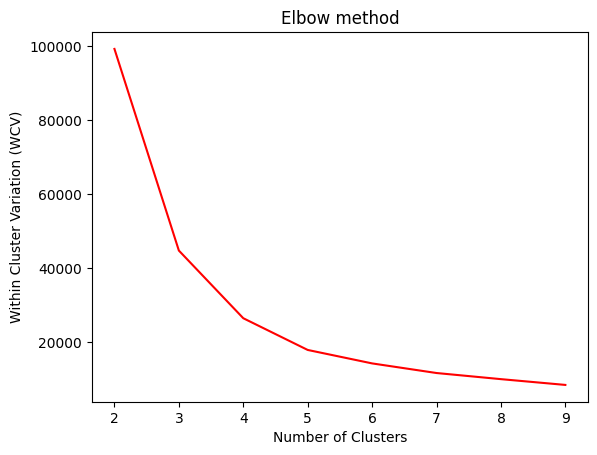

In [46]:
#TODO: Execute the Elbow method.
elbow_method(scaled_data=scaled_data, start_=2, end_=10)

#### Questions D3
* `Q_D3` - What is the optimal amount of clusters?

In [47]:
#TODO: Read the Elbow plot above and decide the optimal amount of clusters.
optimal_amount_of_clusters = 3

Q_D3 = optimal_amount_of_clusters
module.check("D3", Q_D3)

🟢 That's correct!       


3

### D4. Cluster the data

After finding the optimal amount of clusters, we only have to run the `KMeans` algorithm once more to cluster the data. Thereafter, we will combine the data with the `clustering labels` into a single Pandas data frame. This final data frame we will use to further investigate the different `bidding behaviours`.

In [48]:
# Execute the KMeans algorithm to cluster the data.
kmeans = KMeans(
    init= 'k-means++', 
    n_clusters=optimal_amount_of_clusters, 
    random_state=0,
    n_init=10
    ).fit(scaled_data)

In [49]:
# Append the clustering labels to the bid statistics.
bid_statistic['cluster'] = kmeans.labels_
bid_statistic

,auctionID,LotNr,AccountID,NOB,ABP,HBP,TOE,TOX,Duration,cluster
0,200001,1,2623749,3,31000.0,34000.0,0.998297,0.999567,26262.533333,0
1,200001,1,2694572,4,23500.0,25000.0,0.954183,0.989500,26262.533333,0
2,200001,1,2785630,1,22500.0,22500.0,0.956727,0.956727,26262.533333,0
3,200001,1,2851482,2,19000.0,19500.0,0.455016,0.629394,26262.533333,2
4,200001,1,2930599,3,19000.0,20000.0,0.400309,0.683017,26262.533333,2
...,...,...,...,...,...,...,...,...,...,...
1136256,210455,509,2919997,1,15.0,15.0,0.192513,0.192513,46.750000,1
1136257,210455,509,3328984,1,10.0,10.0,0.000000,0.000000,46.750000,1
1136258,210455,516,2834863,1,10.0,10.0,0.000000,0.000000,7027.983333,1
1136259,210455,516,3170566,1,15.0,15.0,0.928540,0.928540,7027.983333,0


### D5. Extract cluster characteristics

Solemnly having the data clustered does not really have any `descriptive business value`. What we want to see is what these clusters imply, which is done through extraction of `cluster characteristics`. In a similar manner as we extracted the clustering characteristics, we can apply Pandas `Groupby` to extract these values. What we would like to see is the following average values for all clusters separately:
* `NOB` - Average Number Of Bids; <br>
* `ABP` - Average Bid Price; <br>
* `HBP` - Average Highest Bid Price; <br>
* `TOE` - Average Time Of Entry; <br>
* `TOX` - Average Time Of Exit. <br>

Use the Pandas `.groupby().agg()` function to extract these features from the bid statistics. Make sure to groupby the `cluster` column, to ensure that the charateristics are calculated for every distinct cluster separately.

In [50]:
#TODO: Apply the .groupby().agg({}) function to extract the cluster characteristics.
cluster_statistics = bid_statistic.groupby(['cluster']).agg({
    'NOB': ['mean'], 
    'ABP': ['mean'], 
    'HBP': ['mean'], 
    'TOE': ['mean'], 
    'TOX': ['mean']
    })

cluster_statistics

,NOB,ABP,HBP,TOE,TOX
,mean,mean,mean,mean,mean
cluster,,,,,
0,2.935153,569.412425,660.483315,0.924981,0.957024
1,1.547005,251.000293,278.914968,0.062987,0.086264
2,3.966066,453.819655,602.468527,0.290776,0.751338


<hr>

## E. Predict sale or no-sale
After clustering (which is unsupervised learning) we are now going to apply supervised learning in the form of forecasting. To improve the auction platform we want to automate the decision about what the starting bid should be. For this, we will use a prediction model which predicts if a product will be sold. By increasing the starting bid iteratively and continuously checking if a product will be sold, we can define a breaking point. This breaking point is where the product goes from a sold prediction to an unsold prediction, which shows the highest starting bid which will result in a sell. <br>

This use case is of course greatly simplified, as the assumption that a higher starting bid will result in a higher final bid is quite a big one. But for the sole purpose of testing whether you understand the fundamentals of supervised learning it will suffice. What we want you to do is the following:
* `Merge & Preprocess`: Manually prepare auctions and lots data set and build a `preprocessing pipeline`; <br>
* `Train/Test split`: Split the lots data set into a 70/30 train/test split <b>(with `random_state=0`!)</b>; <br>
* `Initialize models`: Initialize both the `LogisticRegression` and `RandomForestClassifer` using defaul settings and `random_state=0`; <br>
* `Train models`: Train both models on the train set using `.fit(X, y)`; <br>
* `Predict`: Use the trained model to predict the labels of the test set using `.predict(X, y)`; <br>
* `Evaluate models`: Evaluate the performance of the models using the `accuracy` and plot the `confusion matrix`; <br>
* `Save`: Save the best performing model to a `model.pkl` file for later usage; <br>
* `Implement`: Integrate the model into `API` to define a starting bid.

### E1. Merge & Preprocess

First we will merge the auctions and lots table using a SQL query, as this is computationally most efficient. Thereafter, two transformations are neede to be done, namely:
* `Datetime values` - Transform datetime objects into tangible numeric value; <br>
* `Categorical values` - Apply one-hot encoding to categorical variables. <br>

After completing these manual preprocessing steps we will create a `preprocessing pipeline`. This enables us to more quickly test out different preprocessing steps, while ensuring that we execute all the steps in the correct order. This prevents the previously explained phenomenon of `data spoilage` to occur.

In [51]:
#TODO: Write a SQL query with a left join of auctions on lots.auctionID = auctions.id
sql_merge_query = """
                SELECT
                    lots.auctionID, 
                    lots.lotNr, 
                    lots.numberOfItems, 
                    lots.estimatedValue, 
                    lots.startingBid,
                    lots.reserveBid,
                    lots.sold,
                    auctions.auctionStart,
                    auctions.auctionEnd,
                    auctions.branchCategory
                FROM lots
                LEFT JOIN auctions ON 
                    lots.auctionID = auctions.id
                  """

Lots_Sales_Pred = pandas_df_from_database(query=sql_merge_query)
Lots_Sales_Pred

,auctionID,lotNr,numberOfItems,estimatedValue,startingBid,reserveBid,sold,auctionStart,auctionEnd,branchCategory
0,200013,1,1,0.0,10.0,1.0,0,2017-12-19T11:22:29,2018-01-02T14:22:29,consumer
1,200013,2,1,0.0,25.0,1.0,1,2017-12-19T11:22:29,2018-01-02T14:22:29,consumer
2,200013,3,1,0.0,25.0,1.0,0,2017-12-19T11:22:29,2018-01-02T14:22:29,consumer
3,200013,4,1,0.0,25.0,1.0,0,2017-12-19T11:22:29,2018-01-02T14:22:29,consumer
4,200013,5,66,0.0,10.0,1.0,0,2017-12-19T11:22:29,2018-01-02T14:22:29,consumer
...,...,...,...,...,...,...,...,...,...,...
286694,210447,1242,1,700.0,100.0,1.0,1,2019-06-17T15:14:18,2019-06-28T19:14:18,transport
286695,210447,1243,1,1000.0,100.0,1.0,1,2019-06-17T15:14:18,2019-06-28T19:14:18,transport
286696,210447,1244,1,700.0,100.0,1.0,1,2019-06-17T15:14:18,2019-06-28T19:14:18,transport
286697,210447,1245,1,700.0,100.0,1.0,1,2019-06-17T15:14:18,2019-06-28T19:14:18,transport


In [52]:
# Transform auctionStart and auctionEnd into a single column depicting the duration of the auction in hours
Lots_Sales_Pred[['auctionStart', 'auctionEnd']] = Lots_Sales_Pred[['auctionStart', 'auctionEnd']].apply(pd.to_datetime, errors='coerce') 
Lots_Sales_Pred['auctionDuration'] = (Lots_Sales_Pred['auctionEnd'] - Lots_Sales_Pred['auctionStart']).apply(lambda x: abs(x/pd.Timedelta('1 hour')))
Lots_Sales_Pred.drop(['auctionStart', 'auctionEnd'], axis=1, inplace=True)

Lots_Sales_Pred

,auctionID,lotNr,numberOfItems,estimatedValue,startingBid,reserveBid,sold,branchCategory,auctionDuration
0,200013,1,1,0.0,10.0,1.0,0,consumer,339.0
1,200013,2,1,0.0,25.0,1.0,1,consumer,339.0
2,200013,3,1,0.0,25.0,1.0,0,consumer,339.0
3,200013,4,1,0.0,25.0,1.0,0,consumer,339.0
4,200013,5,66,0.0,10.0,1.0,0,consumer,339.0
...,...,...,...,...,...,...,...,...,...
286694,210447,1242,1,700.0,100.0,1.0,1,transport,268.0
286695,210447,1243,1,1000.0,100.0,1.0,1,transport,268.0
286696,210447,1244,1,700.0,100.0,1.0,1,transport,268.0
286697,210447,1245,1,700.0,100.0,1.0,1,transport,268.0


In [53]:
#TODO: Fill in the blanks below to complete the pipeline creation function.
def create_pipeline(scaler, encoder, clf, cat_col:list, num_col:list) -> Pipeline:
    """
    Take the imputer, scaler, encoder and classifier and create and return a sklearn pipeline.

    Args:
        scaler (_type_): Scaling module, used to scale the data to a set range of values.
        encoder (_type_): Encoding module, used to transform categorical values to a workable format.
        clf (_type_): Classification model, which can be any model from the sklearn classification model catalog.
        cat_col (list): A list of the categorical columns that need to be transformed.
        num_col (list): A list of the numerical columns that need to be transformed.

    Returns:
        Pipeline: Pipeline containing all preprocessing and classification models.
    """
    # 2 sub-pipelines, one for numeric features, other for categorical ones
    numeric_pipe = make_pipeline(scaler)
    categorical_pipe = make_pipeline(encoder)

    # Using categorical pipe for feature State, numeric pipe otherwise
    preprocessor = make_column_transformer((categorical_pipe, cat_col), 
                                            (numeric_pipe, num_col),
                                            remainder='passthrough')
    
    return Pipeline(steps=[('preprocess', preprocessor), ('clf', clf)])

### E2. Train/Test Split

The quality of the `supervised learning` method is in a big way dependent on de amount of data that is available. As we have to split the data into a `train and test set`, the set used for training the model also decreases in size. For this reason it is a must to put this data to good use to get a reliable evaluation of the performance of different models. <br>

Using the `train_test_split()` function we will create a 70/30 train/test split. Please make sure to set the `random_state` to 0, to retrieve similar answers everytime you run the code. This is needed to help our `evaluation functions` to work properly as well.

In [54]:
# First split the data in independent (X) and dependent (y) variables
X_sale = Lots_Sales_Pred.copy().drop(['auctionID', 'lotNr', 'sold'], axis=1)
y_sale = Lots_Sales_Pred['sold'].copy()

X_train, X_test, y_train, y_test = train_test_split(X_sale, y_sale, test_size=0.3, random_state=0)
print(f'Created a training set containing {len(X_train)} records and a test set containing {len(X_test)} records')

Created a training set containing 200689 records and a test set containing 86010 records


### E3. Initialize models
Before training and using our models, we first have to `initialize` them. For this we will use the Python library `Scikit-Learn`. Please initialize the following models:
* `MinMaxScaler()` - Used to scale the numerical data between the values of 0 and 1;
* `OneHotEncoder()` - Used to encode the categorical data to either a 1 or 0;
* `LogisticRegression()` - First model to test to classify either a sale or no-sale;
* `RandomForestClassifier()` - First model to test to classify either a sale or no-sale;

In [55]:
#TODO: Initialize the scaler and encoder
scaler = MinMaxScaler()
encoder = OneHotEncoder()

# Define columns to pass through scaler and encoder
sclr_col = ['numberOfItems', 'estimatedValue', 'startingBid', 'reserveBid', 'auctionDuration']
encd_col = ['branchCategory']

In [56]:
#TODO: Initialize both models.
classifiers = [
     LogisticRegression(max_iter=5000, random_state=0),
     RandomForestClassifier(random_state=0)
     ]

### E4. Train models and predict
Now we have initialized our models, it is time to train them on our data. Training can be done using the `.fit(X,y)` function that is an inherent function of every `scikit-learn` model. Make sure to train the model only on the `train set`, as we will use the `test set` for evaluation of the trained model. Training will be done using a `pipeline`, which ensures that all the preprocessing steps are done in the correct order. To create such a pipeline we utilize the `create_pipeline()` function we developed earlier.

In [57]:
#TODO: Create a dictionary to hold the classification results.
predictions_clf = {
    'LogisticRegression': None,
    'RandomForestClassifier': None
    }

In [58]:
#TODO: Loop over both classifiers, create and fit a pipeline and retrieve the predictions.
for clf in classifiers:
    name_clf = str(clf).split('(')[0]

    # Combine with learning algorithm in another pipeline
    pipe = create_pipeline(scaler, encoder, clf, cat_col=encd_col, num_col=sclr_col)
    clf_pipe = pipe.fit(X=X_train, y=y_train)

    # Save the predicted values in a list
    predictions_clf[name_clf] = clf_pipe.predict(X_test)
    
    # Print the test accuracy
    print(f"{name_clf} test accuracy: {clf_pipe.score(X_test, y_test):.3f}")

LogisticRegression test accuracy: 0.818
RandomForestClassifier test accuracy: 0.843


Confusion Matrix: Logistic Regression


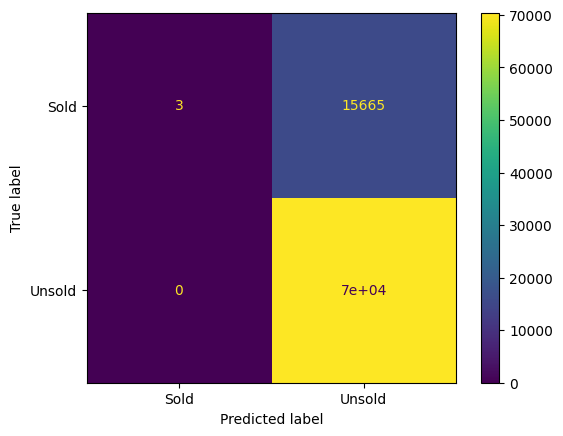

In [59]:
# Create and print the Confusion Matrix for the Logistic Regression.
print(f'Confusion Matrix: Logistic Regression')
cm_logRes = confusion_matrix(y_test, predictions_clf['LogisticRegression'])
disp = ConfusionMatrixDisplay(cm_logRes, display_labels=['Sold', 'Unsold']).plot()

Confusion Matrix: Random Forest Classifier


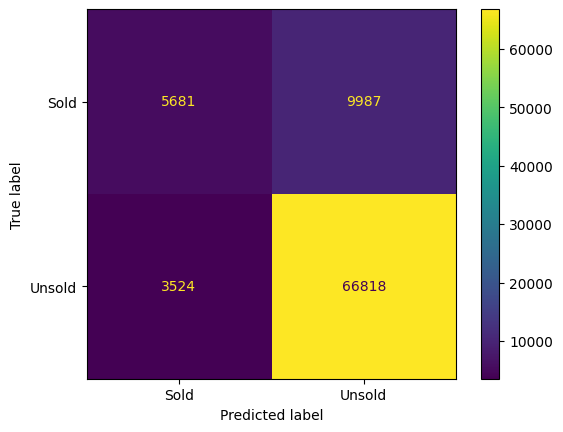

In [60]:
#TODO: Transform code to print the Confusion Matrix for the Random Forest Classifier.
print(f'Confusion Matrix: Random Forest Classifier')
cm_rf = confusion_matrix(y_test, predictions_clf['RandomForestClassifier'])
disp = ConfusionMatrixDisplay(cm_rf, display_labels=['Sold', 'Unsold']).plot()

### E5. Save model
Now we have trained and tested our models, we are able to define which model performs best and thus which model we want to further investigate and/or put into `operation`. Now we will save the best performing model, but before we do we will train a new version on all our data. No train/test set are needed anymore, as we will not test the model against other models. We will solemnly use it, so we can utilize the entire data set to further optimize the performance. <br>

To save your model we will use a `pickle (.pkl)` file, which is often used to save objects in Python. We will do this using the `joblib.dump()` function. Later on we can load the .pkl file and retrieve the trained version of our pipeline.

In [62]:
#TODO: Develop and train a new pipeline with the best performing model as classifier:
pipe_to_save = create_pipeline(
                    scaler=MinMaxScaler(),
                    encoder=OneHotEncoder(),
                    clf=RandomForestClassifier(random_state=0),
                    cat_col=['branchCategory'],
                    num_col=['numberOfItems', 'estimatedValue', 'startingBid', 'reserveBid', 'auctionDuration']
                    )

trained_pipe = pipe_to_save.fit(X=X_sale, y=y_sale)

In [63]:
#TODO: Use joblib.dump() to save the model with the name "trained_pipeline.pkl".
joblib.dump(trained_pipe, f"trained_pipeline.pkl") 

['trained_pipeline.pkl']

### E6. Implement
To put our model to use, we will integrate it into the `API` which enables the user to create a lot. When a new lot is created a fundamental step is to decide the `starting price` of the auctioned lot. To make this data driven, your task is to implement the prediction model to automatically set an optimal price. This is done through `incrementally` increasing the starting bid until the lot prediction of the lot goes from sold to unsold. <br>

Implementing the automation of the starting bid is of course hugely `simplified`, as it acquiesces on the assumption that a higher starting bid will result in a higher final bid. However, for the sole purpose of deploying an AI model it suffices. <br>

To execute this assignment, go to the directory called `app` and open the python file `Services`. Here you need to change the functionality of the `create_lot()` function. Within this function some basis code is already given (which you have to uncomment), to get you up to speed.

#### Questions E6
* `Q_E6` - What is the starting price of the following auction:

Using your newly created API in the Swagger UI and test the following auction:
* `numberOfItems`: 7; <br>
* `estimatedValue`: 100; <br>
* `reserveBid`: 1.0; <br>
* `branchCategory`: transport; <br>
* `auctionDuration`: 250.0; <br>
* `min_starting_bid`: 5; <br>
* `max_starting_bid`: 155; <br>
* `step_size`: 5. <br>

In [ ]:
Q_E6 = ...
module.check("Q_E6", Q_E6)

### F. Dashboarding
Finally we will guide you through the process of connecting your database to a PowerBI dashboard. In most cases, this is a logical step in a Data Science project. Executing the steps below will allow you to start creating a dashboard to gain data insights.
* `Setup environment` - Download the `SQLite ODBC driver` and `PowerBI` (if not done already); <br>
* `Get Data` - Open PowerBI and press the "Get Data" button and make an ODBC connection; <br>
* `Settings` - Set DSN to None and open "Advanced settings"; <br>
* `Connection string` - Write the connection string as follows: `DRIVER={SQLite3 ODBC Driver};Database=C:\ [PATH TO THIS DIRECTORY] \database.db`; <br>
* `Login` - Write a random username and password (will not be checked but needed to pursue); <Br>
* `Load data` - Press "Load Data" to get the data into `PowerBI`; <br>
* `Bug Fixing` - Fix `many-to-many` cardinality by creating additional column with `auctionLotID` in both lots and bids data set.